## 豆瓣影评分析.
通过程序获取豆瓣的评论，共计获取了20页，由于部分评论出错导致本页面其它评论也无法获取，共计365条数据

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# 读入评论数据 并分行
df = pd.read_excel("中华小子评论.xlsx")
df.columns = ['时间', '星级', '评论']
df

,时间,星级,评论
0,2014-10-17,5,童年最爱的动画之一，再无下文一直是心中的痛。
1,2013-05-31,5,合拍片。用中国元素打造中国魔幻，这是国产应该有的姿态！
2,2015-03-22,4,曾经让我觉得中国动漫还有希望的动画片
3,2016-06-08,4,制作在当时堪称精良，虽然被腰斩，但因借鉴火影的单元剧模式，在结构上还是相对完整，值得回味。P...
4,2016-02-13,5,我当年差点没因为这个出家我会乱说？！
...,...,...,...
360,2017-08-27,4,跟同事聊起国产动画，翻出来看，06年的现在看除了打斗场面有些不流畅以外，可以说是制作精良，画...
361,2020-04-17,5,很好看，不过当年没看完，，，，才知道这部动画没有结局
362,2019-07-27,5,小时候就有印象的，电视放了好几次，但我其实没有太喜欢
363,2020-08-24,5,我记得挖了坑没有填 anyway 特别cult 小学放学很晚 动画城看不到 只能晚上守着少儿...


### 星级统计
文档中共计365条星级数据,由于星级恰好是1~5的数字，通过可以计算列表各元素之和再平均得出评分，再统计各星级出现次数时，创建一个列表，索引为星级-1，如果星级为多少就在列表对应位置加1

In [6]:
# 总分数
sum_star = 0
# 各分数次数，依照索引依次为1,2,3,4,5
star_list = [0,0,0,0,0]
for star in df['星级']:
    sum_star += star
    index = star-1
    star_list[index] += 1

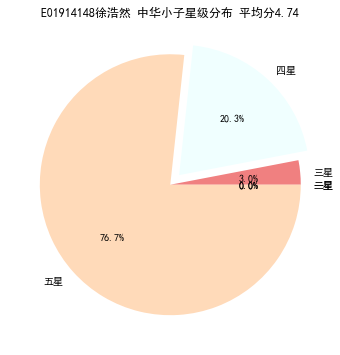

In [7]:
# 星级评分保留两位小数
average_star = round(sum_star/len(df['星级']),2)
#设置中文显示
plt.rcParams['font.sans-serif']='SimHei'
# 设置画布，画出正圆
plt.figure(figsize=(6,6))
#定义饼图的标签，标签是列表
label=['一星','二星','三星','四星','五星']
# 仅四星级向外扩大
explode=[0,0,0,0.1,0]
colors = ['blue','fuchsia','lightcoral','azure','peachpuff']
plt.pie(star_list,explode=explode,labels=label,colors=colors,autopct='%1.1f%%')#绘制饼图
plt.title(f'E01914148徐浩然 中华小子星级分布 平均分{average_star}')
plt.show()

### 年度评论量
在获取的365条评论中，通过分析评论时间，可以反映出其热度，由于其评论排序与时间也有关，收集的365调数据大多是近几年

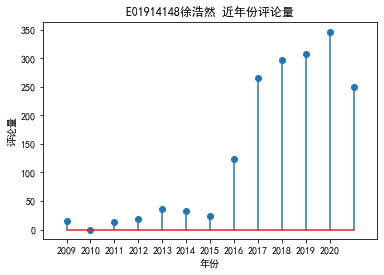

In [8]:
# 为了使分月时，第二列显示出数量重新分列，
df.columns = ['时间','数量',' ']
# 将数据类型转换为日期类型
df['时间'] = pd.to_datetime(df['时间'])
# 将date设置为index
df_time = df.set_index('时间')
# 依照年份分离数据 共统计出了 2009到2021的数据
df_month = df_time.resample('Y').sum().to_period('Y')

# make data
x = [i for i in range(2009,2022)]
y = df_month['数量']

# plot
fig, ax = plt.subplots()
ax.stem(x, y)
ax.set(xlim=(2008, 2022), xticks=np.arange(2009, 2021))
ax.set_title("E01914148徐浩然 近年份评论量")
ax.set_xlabel("年份")
ax.set_ylabel("评论量")
plt.show()

### 月度评论量
通过对年度评论量大的近三年数据进行分析，我们可以发现评论量在每年的3月和8月激增，这也与寒暑假相对应

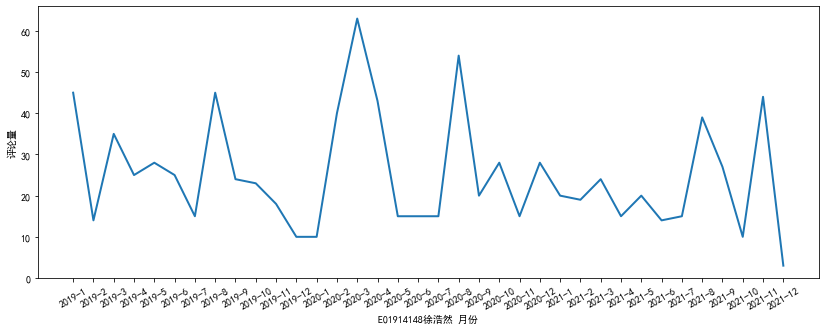

In [9]:
# 为了使分月时，第二列显示出数量重新分列，
df.columns = ['时间','数量',' ']
# 将数据类型转换为日期类型
df['时间'] = pd.to_datetime(df['时间'])
# 将date设置为index
df_time = df.set_index('时间')
# 依照月份份分离数据 共统计出了 2009到2021的数据
df_month = df_time.resample('M').sum().to_period('M')
# 仅提取2019-2022的月份数据
df_month = df_month[-36:]

# make data
mouth_list = []
for y in range(2019,2022):
    for m in range(1,13):
        mouth_list.append(f"{y}-{m}")

# plot
fig, ax = plt.subplots(figsize=(14,5))
ax.plot(mouth_list,df_month['数量'], linewidth=2.0)
plt.xticks(rotation=30)
ax.set_xlabel("E01914148徐浩然 月份")
ax.set_ylabel("评论量")
plt.show()

### 句子云图



In [82]:
#导包
import wordcloud
# 重新分列
df.columns = ['时间', '星级', '评论']
sentence_sum = ''

# 遍历评论
for comment in df['评论']:
    # print(comment)
    sentence_sum = sentence_sum + ' ' + comment
font = r'C:\Windows\Fonts\simfang.ttf'
w = wordcloud.WordCloud(
    font_path=font,
    background_color='white',
    width=3840,
    height=2160,
)
w.generate(sentence_sum)
w.to_file('中华小子句云图.png')

### 评论关键词云图

In [90]:
# 导入jieba分词包
import jieba
#  存放解析出的关键词
keywords = []
# 过滤器，去除其中的词
filter=['画片','但是','真的','虽然','时候','现在','还是','一个','小时','觉得']
for comment in df['评论']:
    # jieba 切开句子
    word_list = jieba.lcut_for_search(comment)
    # 列表推导式去除单个字符的干扰项
    word_list = [i for i in word_list if (len(i)>1 and i not in filter)]
    # 过滤后的列表加在一起
    keywords +=word_list

font = r'C:\Windows\Fonts\simfang.ttf'
w = wordcloud.WordCloud(
    font_path=font,
    background_color='white',
    width=3840,
    height=2160,
)
# 列表最终加载成字符串
w.generate(" ".join(keywords))
w.to_file('中华小子词云图.png')